# 威斯康辛州乳腺癌数据集分类及可视化

# 目录

+ 工程介绍-黄依婷
+ Packages
+ 数据加载与可视化
  + 数据读入-黄依婷
  + 数据清洗-黄依婷、王由权
  + 分析和可视化-黄依婷、曹斌杰、王由权、丁梦博
+ 数据预处理与准备-黄依婷、丁梦博
+ 数据集分类算法
  + LogisticRegression逻辑回归-何珮琳
  + HistGradientBoosting梯度提升-曹斌杰
  + DecisionTree决策树-黄依婷
  + RandomForest随机森林-黄依婷
  + SVM支持向量机-王由权
  + KNN   K邻近算法-袁亮亮
  + ExtraTree极度随机树-袁亮亮
  + XGBoost极端梯度提升-袁亮亮
+ 模型效果比较
  + 准确率比较-曹斌杰
  + 特征贡献度分析-曹斌杰、袁亮亮

# 工程介绍-黄依婷

乳腺癌（Breast Cancer），轻称乳癌，是女性常见的恶性肿瘤，发病年龄从20岁起逐年升高，45-50岁达最高点，全球女性杀手第一名，中国乳腺癌病例占全世界的30%，近年呈逐年增长趋势。若乳腺癌确诊，医生根据疾病性质指定个人化的治疗方案。

乳腺癌存在大量的研究进展与研究工作，本工程涉及的乳腺癌数据集分类及可视化任务，是在医疗领域中的重要研究方向之一。精确快速的分类和诊断对于乳腺癌患者的治疗和生存率具有重要意义，可以帮助医生更快速地做出准确诊断，以及医学研究者进行相关的学术研究，对乳腺癌治疗的方案研究也有积极作用。
    
利用机器学习算法对患者的数据进行分类，主要基于scikit-learn库提供的机器学习算法，如Logistic Regression逻辑回归、HistGradientBoosting梯度提升、Decision Tree决策树、Random Forest随机森林、SVM支持向量机、KNN K邻近算法、Extra Tree极度随机树、XGBoost极端梯度提升等来进行模型训练与分类。利用相关算法计算评估各个分类模型的指标，以此来比较不同的分类模型，得到效果最好的分类方法。
    
同时，利用seaborn或matplotlib等库进行数据可视化，展示分类结果以及数据特征的分布等。

# Packages

过程中需要导入的的包和库

In [2]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier

# 数据加载和可视化

## 数据读入-黄依婷

使用pandas库来读取CSV文件
+ head() 方法默认返回DataFrame的前五行（或更少的行，如果DataFrame中的行数少于五），查看数据集的快速方法，以确保数据已正确加载并且看起来如预期。

In [36]:
data = pd.read_csv('D:\\ComputerHomework\\Machine_Learning\\大作业\\data.csv', header = 0)
data.head()  

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]


数据集的维数

In [37]:
data.shape   

(569, 33)

数据集信息

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## 数据清洗-黄依婷、王由权

数据清洗(Data cleaning)是对数据进行重新审查和校验的过程，目的在于删除重复信息、纠正存在的错误，并提供数据一致性。数据清洗是数据预处理的第一步，也是保证后续结果正确的重要一环。不符合要求的数据主要是有不完整的数据、错误的数据、重复的数据三大类。

In [39]:
# 特征id和未命名项属于不符合要求的数据，可以去除这两列
data.drop(columns=['id','Unnamed: 32'],inplace=True)
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

处理过的数据集信息

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5


数据描述、分析，均值方差、最大最小值、分位数等


In [41]:
 data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

## 数据可视化-黄依婷、曹斌杰、王由权、丁梦博

将抽象的数据转化为易于理解的图表和图形，使信息更加直观，更快速地识别数据中的模式、趋势和异常情况，从而支持做出更快速的判断。
本工程中乳腺癌数据集可视化包括诊断结果（良性B和恶性M）、各特征平均值、各特征标准误差、各特征最差值、特征散点图矩阵、箱线图可视化。

每个细胞核计算十个实值特征：
+  半径（从中心到周长点的距离的平均值）
+ 纹理（灰度值的标准偏差）
+ 周长
+  面积
+ 平滑度（半径长度的局部变化）
+ 紧凑度（周长^2 / 面积 - 1.0）
+ 凹陷（轮廓凹陷部分的严重程度）
+ 凹点（等高线凹陷部分的数量）
+ 对称性
+ 分形维数（“海岸线近似” - 1）

导入seaborn和matplotlib.pyplot用来绘制数据统计图形，以便可视化和理解数据。

图表的设置

In [42]:
# 以便用于图表显示中文标题
plt.rcParams['font.sans-serif'] = ['DengXian']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus']=False

（1）可视化乳腺癌诊断结果（良性B和恶性M）

In [10]:
# 表格可视化数据
diagnosis = data['diagnosis'].value_counts().reset_index()
diagnosis

diagnosis  count
0         B    357
1         M    212

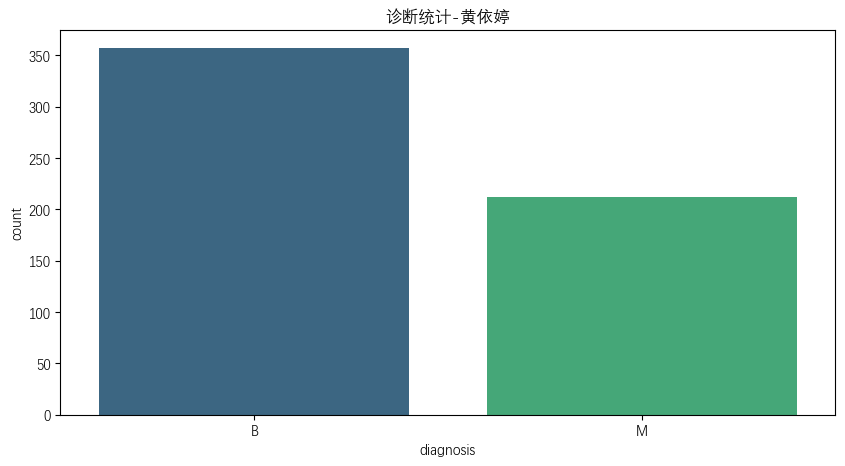

In [11]:
# 图表可视化数据
plt.figure(figsize=(10, 5))
sns.barplot(x='diagnosis', hue='diagnosis', y='count',  data=diagnosis, palette='viridis')
plt.xlabel('diagnosis')
plt.ylabel('count')
plt.title('诊断统计-黄依婷')   # 图标题
plt.show()

（2）各特征平均值可视化

In [12]:
# 表格可视化平均值数据
dimensions_mean = data[['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                 'concave points_mean','symmetry_mean', 'fractal_dimension_mean']].sum().reset_index()

# 重命名，以便绘制图像、分类
dimensions_mean.rename(columns={
    'index' : 'dimensions_mean',
    0 : 'sum of dimensions_mean'
},inplace=True)

dimensions_mean

dimensions_mean  sum of dimensions_mean
0             radius_mean             8038.429000
1            texture_mean            10975.810000
2          perimeter_mean            52330.380000
3               area_mean           372631.900000
4         smoothness_mean               54.829000
5        compactness_mean               59.370020
6          concavity_mean               50.526811
7     concave points_mean               27.834994
8           symmetry_mean              103.081100
9  fractal_dimension_mean               35.731840

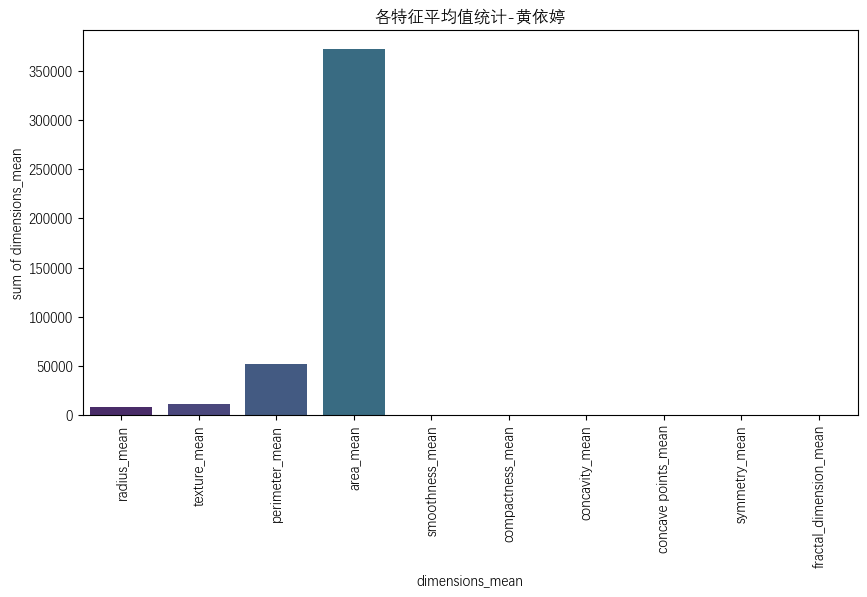

In [13]:
# 图表可视化平均值数据
plt.figure(figsize=(10, 5))   # 设置图表宽高
plt.title('各特征平均值统计-黄依婷')  # 图表标题

# x为各特征平均值，y为各特征平均值的总和
sns.barplot(x='dimensions_mean', hue='dimensions_mean', y='sum of dimensions_mean', data=dimensions_mean, palette='viridis')  
plt.xlabel('dimensions_mean')   
plt.xticks(rotation=90)  
plt.ylabel('sum of dimensions_mean')   
plt.show()

（3）各特征标准误差可视化

表格可视化标准误差数据

In [14]:
dimensions_se = data[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 
                   'symmetry_se', 'fractal_dimension_se']].sum().reset_index()

# 重命名，以便绘制图像、分类
dimensions_se.rename(columns={
    'index' : 'dimensions_se',
    0 : 'sum of dimensions_se'
},inplace=True)

dimensions_se

dimensions_se  sum of dimensions_se
0             radius_se            230.542900
1            texture_se            692.389600
2          perimeter_se           1630.787700
3               area_se          22951.798000
4         smoothness_se              4.006317
5        compactness_se             14.497061
6          concavity_se             18.147525
7     concave points_se              6.712002
8           symmetry_se             11.688568
9  fractal_dimension_se              2.159300

图表可视化标准误差数据

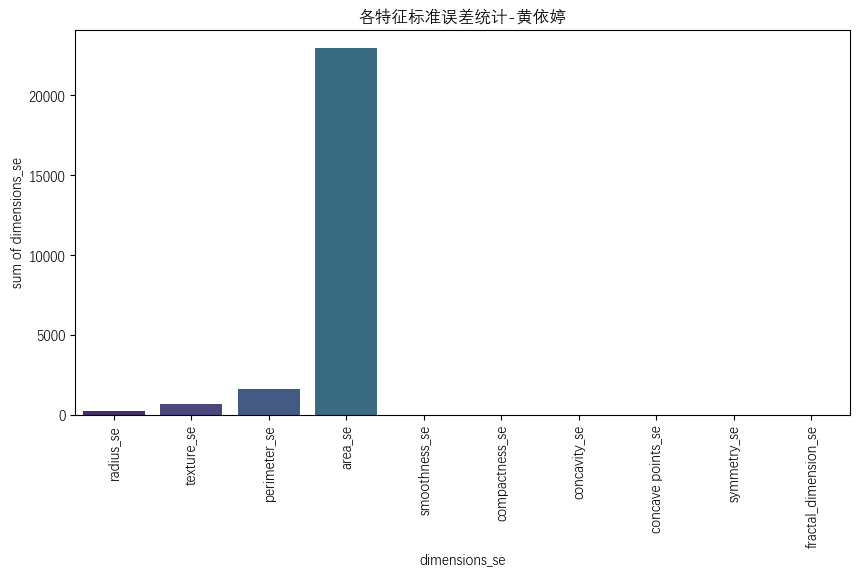

In [15]:
plt.figure(figsize=(10, 5))   # 设置图表宽高
plt.title('各特征标准误差统计-黄依婷')   # 图表标题

# x为各特征标准误差，y为各特征标准误差的总和
sns.barplot(x='dimensions_se', hue='dimensions_se', y='sum of dimensions_se', data=dimensions_se, palette='viridis')   
plt.xlabel('dimensions_se')   
plt.xticks(rotation=90)   
plt.ylabel('sum of dimensions_se')   
plt.show()

（4）各特征最差值可视化

表格可视化最差值数据

In [16]:
dimensions_worst = data[['radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 
                             'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']].sum().reset_index()

# 重命名，以便绘制图像、分类
dimensions_worst.rename(columns={
    'index' : 'dimensions_worst',
    0 : 'sum of dimensions_worst'
},inplace=True)

dimensions_worst

dimensions_worst  sum of dimensions_worst
0             radius_worst              9257.169000
1            texture_worst             14610.340000
2          perimeter_worst             61031.630000
3               area_worst            501051.800000
4         smoothness_worst                75.317730
5        compactness_worst               144.676810
6          concavity_worst               154.875247
7     concave points_worst                65.210941
8           symmetry_worst               165.053000
9  fractal_dimension_worst                47.765170

图表可视化最差值数据

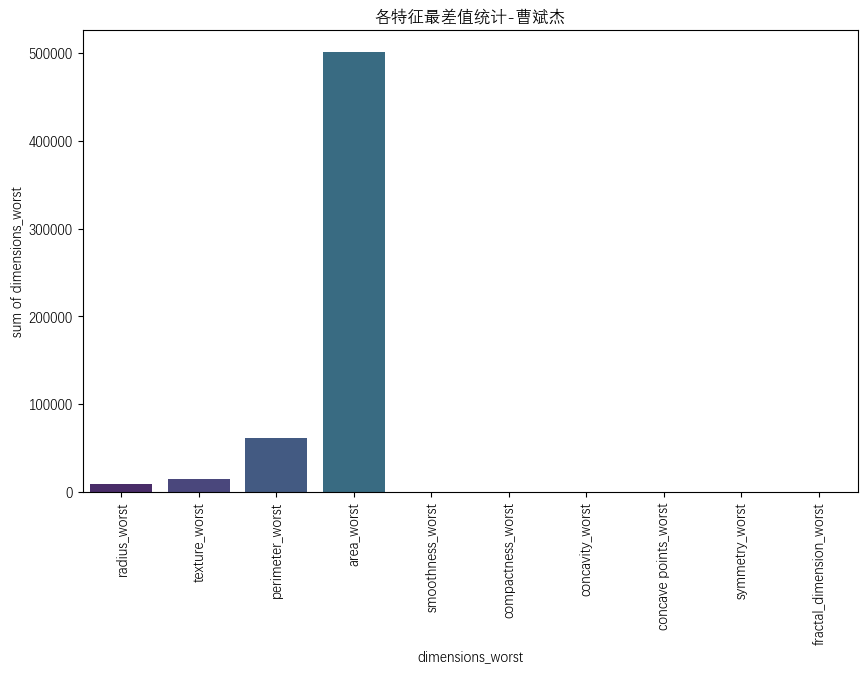

In [17]:
plt.figure(figsize=(10, 6))   # 设置图表宽高
plt.title('各特征最差值统计-曹斌杰')    # 图表标题

# x为各特征最差值，y为各特征最差值的总和
sns.barplot(x='dimensions_worst', hue='dimensions_worst',  y='sum of dimensions_worst', data=dimensions_worst, palette='viridis')
plt.xlabel('dimensions_worst')   
plt.xticks(rotation=90)   
plt.ylabel('sum of dimensions_worst')   
plt.show()

（5）特征散点图矩阵可视化

根据诊断结果对数据进行分组，绘制各个特征之间的散点图

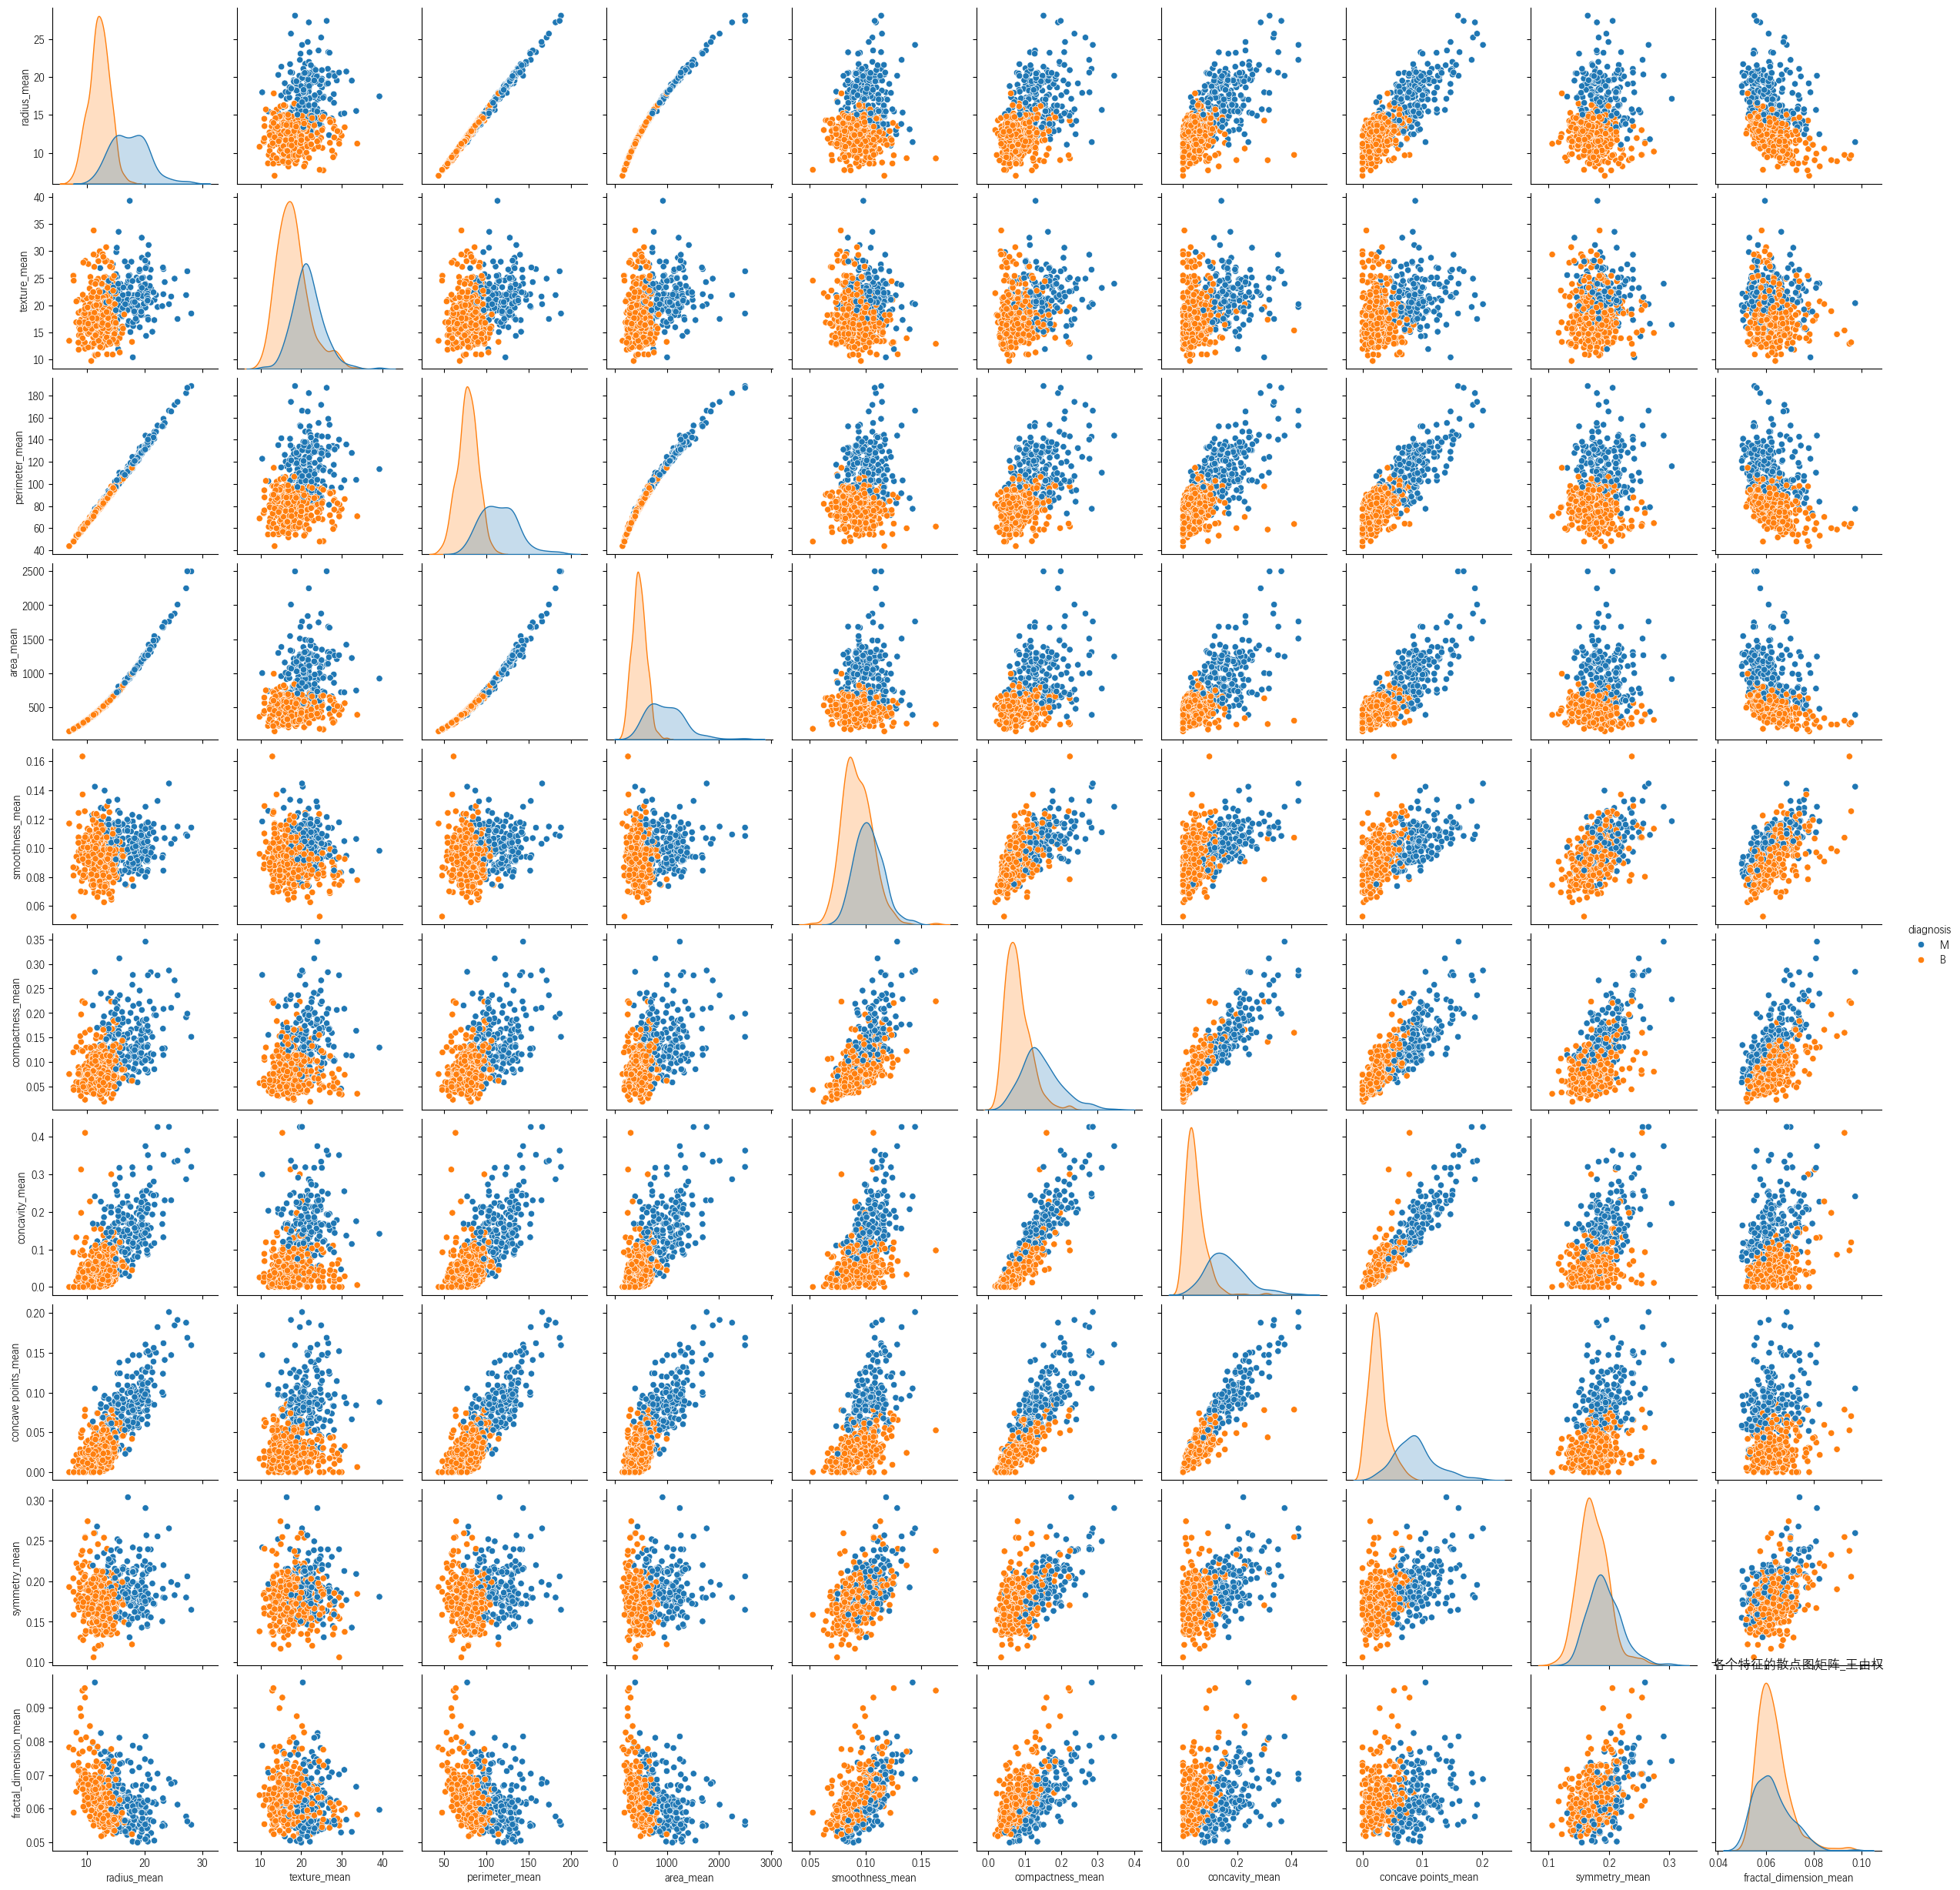

In [18]:
sns.pairplot(data, hue='diagnosis', 
             vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
                   'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])
plt.title("各个特征的散点图矩阵_王由权")
plt.show()

(6)特征柱状图可视化

特征柱状图可视化_丁梦博


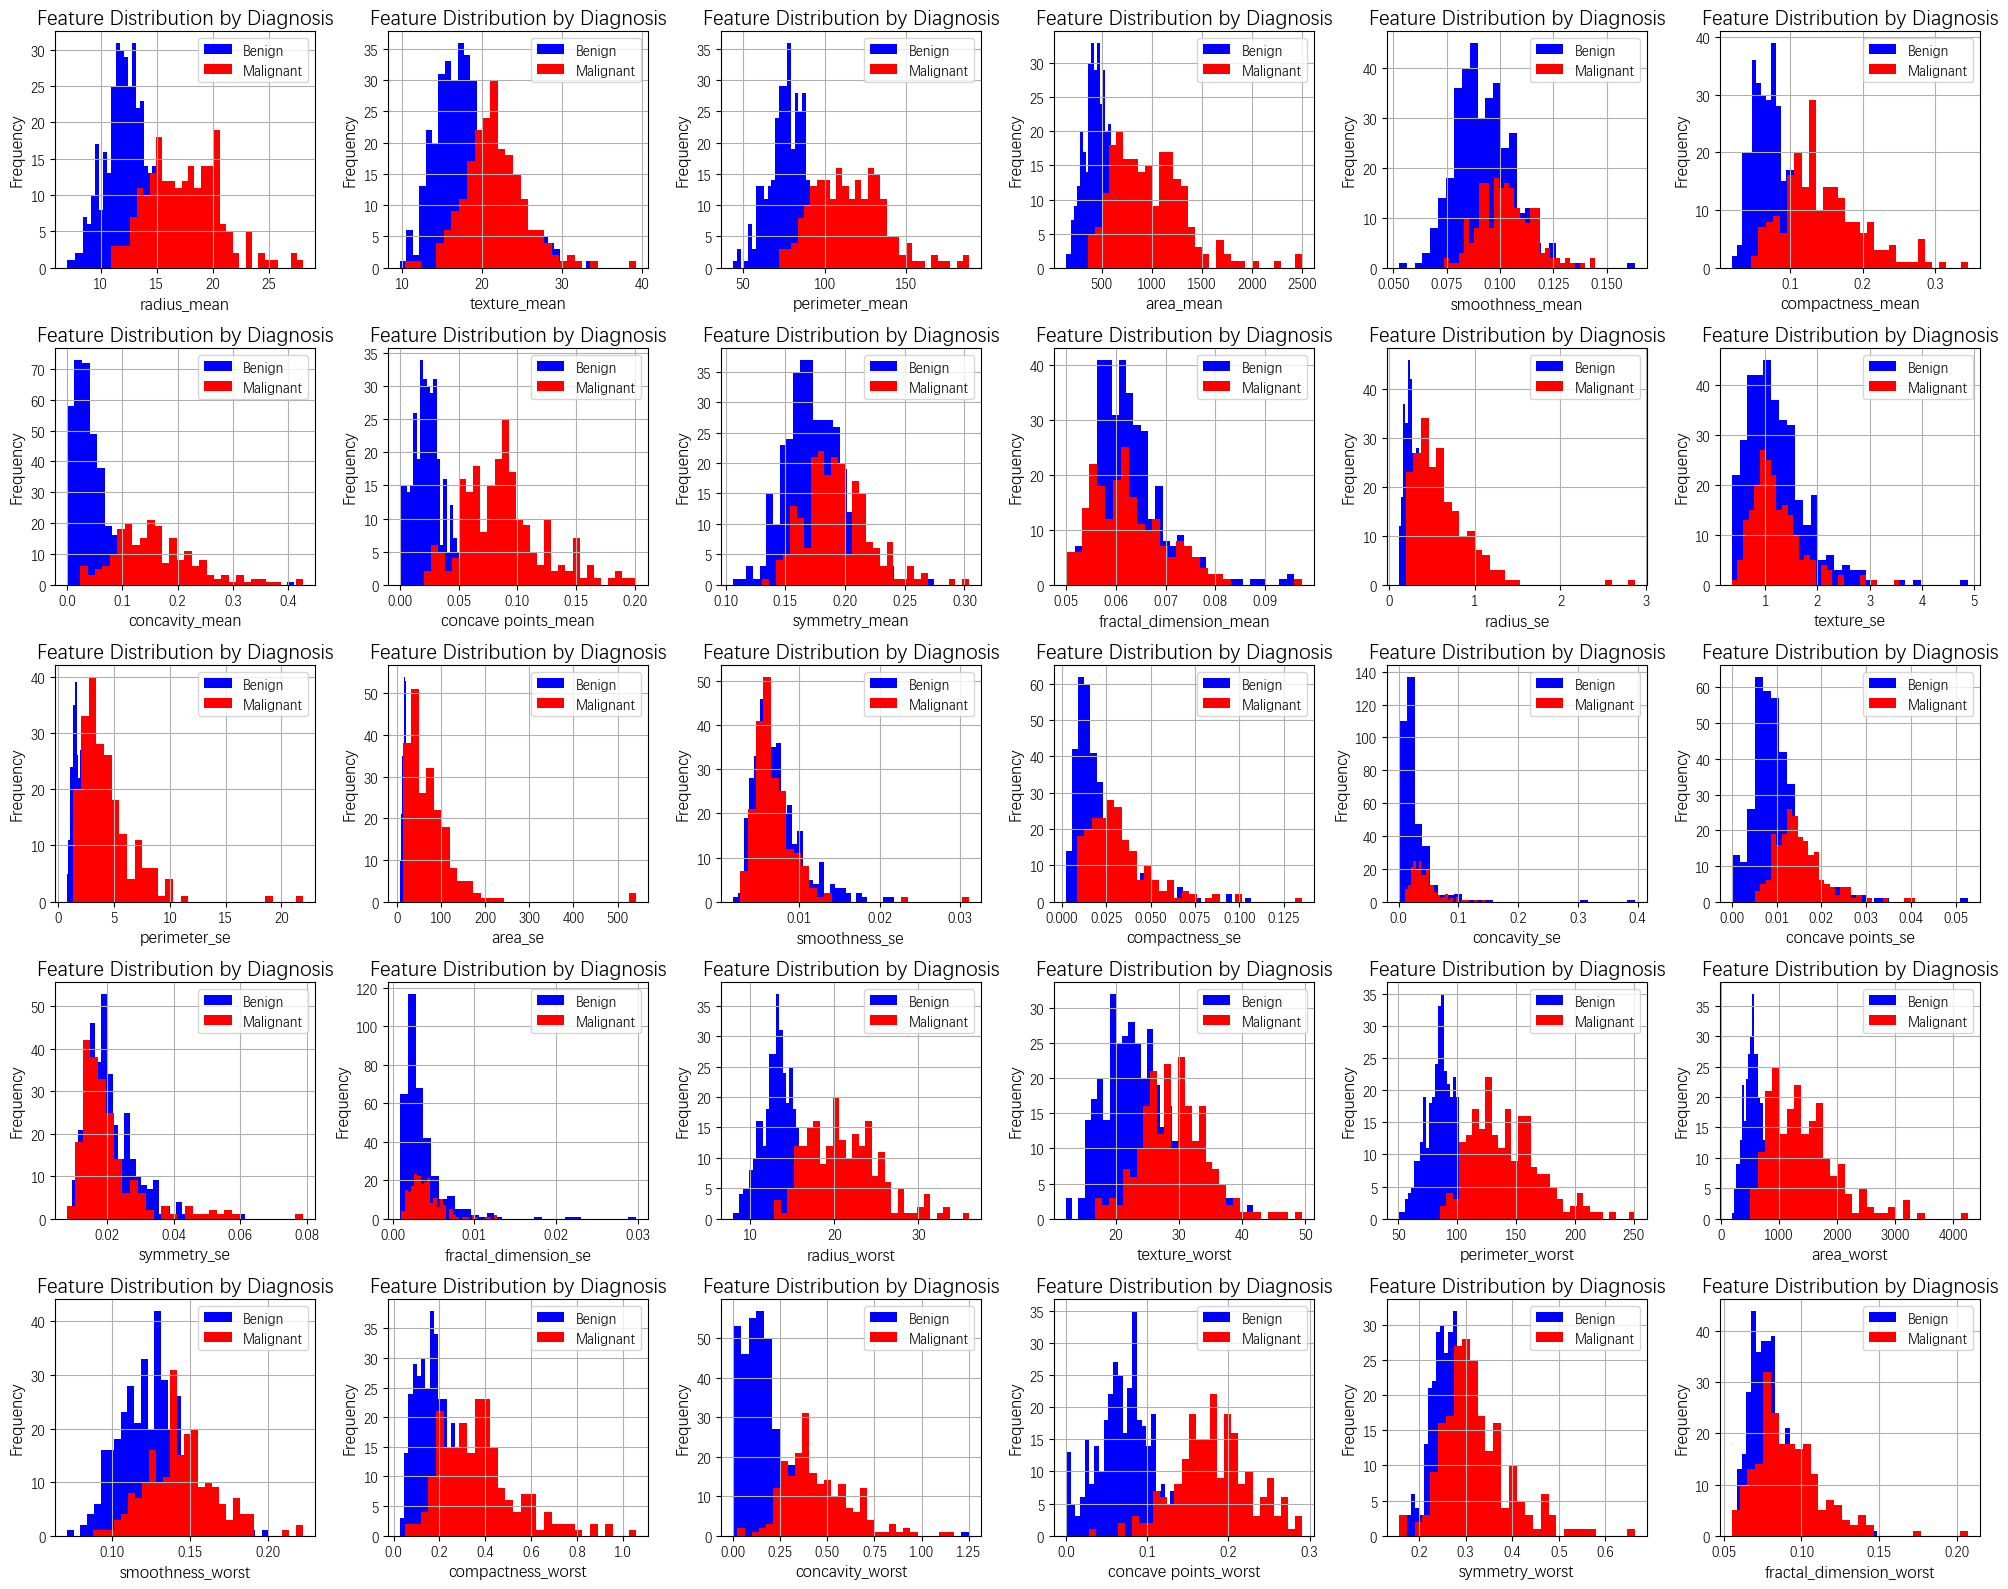

In [48]:
def plot_feature_distribution(X, title):
    plt.figure(figsize=(20, 16))
    for i, feature in enumerate(X.columns):
        plt.subplot(5, 6, i + 1)
        data[data["diagnosis"] == 0][feature].hist(bins=30, color='blue', label='Benign')
        data[data["diagnosis"] == 1][feature].hist(bins=30, color='red', label='Malignant')
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.title(title, fontsize=15)
        plt.legend()
    plt.tight_layout()
    print("特征柱状图可视化_丁梦博")
    plt.show()

X_ = data.drop(columns='diagnosis',axis=1) 
plot_feature_distribution(X_, "Feature Distribution by Diagnosis")

（7）箱线图可视化

与radius_mean相关的诊断结果图像,比较诊断结果关于半径的分散程度

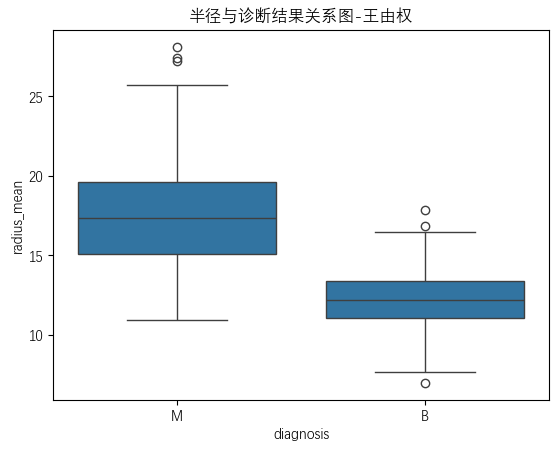

In [24]:
sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.title("半径与诊断结果关系图-王由权")
plt.show()

# 数据预处理与准备-黄依婷、丁梦博

在训练模型之前，我们要对训练数据进行一定的处理。常用的预处理方法包括数据清洗、缺失值处理、数据归一化、特征选择等，由于上文数据可视化过程中已经进行了相关的初步处理，在分类模型建立前还需要对数据进行归一化、特征选择等进一步处理。在使用梯度下降法求最优解时，归一化往往非常有必要，否则很难收敛甚至不能收敛。对特征数据进行归一化，可以加快了梯度下降求最优解的速度。概率模型（树形模型）不需要归一化，因为它们不关心变量的值，而是关心变量的分布和变量之间的条件概率，如决策树、RF。而像Adaboost、SVM、LR、Knn、KMeans之类的最优化问题就需要归一化。

+ 数据标签化：
    + LabelEncoder()   使用0到n_classes-1之间的值对目标标签进行编码，比如把类别“恶性M”和“良性B”编号为0和1。
    + fit_transform()   使适合标签编码器并返回编码。
+ 绘制相关矩阵，这样我们可以确定哪一列影响较大，哪一列影响较小或者不影响。
    + heatmap()   热力图在展示列联表的数据分布上也有较大的用途，通过热力图我们可以非常直观地感受到数值大小的差异状况。
+ 数据分割，即训练和测试数据的准备：
    + train_test_split() 将X和y分割为训练集（X_train和y_train）和测试集（X_test和y_test），测试集占总数据25%，设定随机种子以确保数据分割的可复现性。
    + StandardScaler() 去均值和方差归一化，使得经过处理的数据符合标准正态分布，即均值为0，标准差为1。这是针对每一个特征维度来做的，而不是针对样本。
    + fit_transform() 标准化数据，先拟合数据再将其转化为标准形式。

数据标签化

In [44]:
labelencoder = LabelEncoder()
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'])

绘制相关矩阵

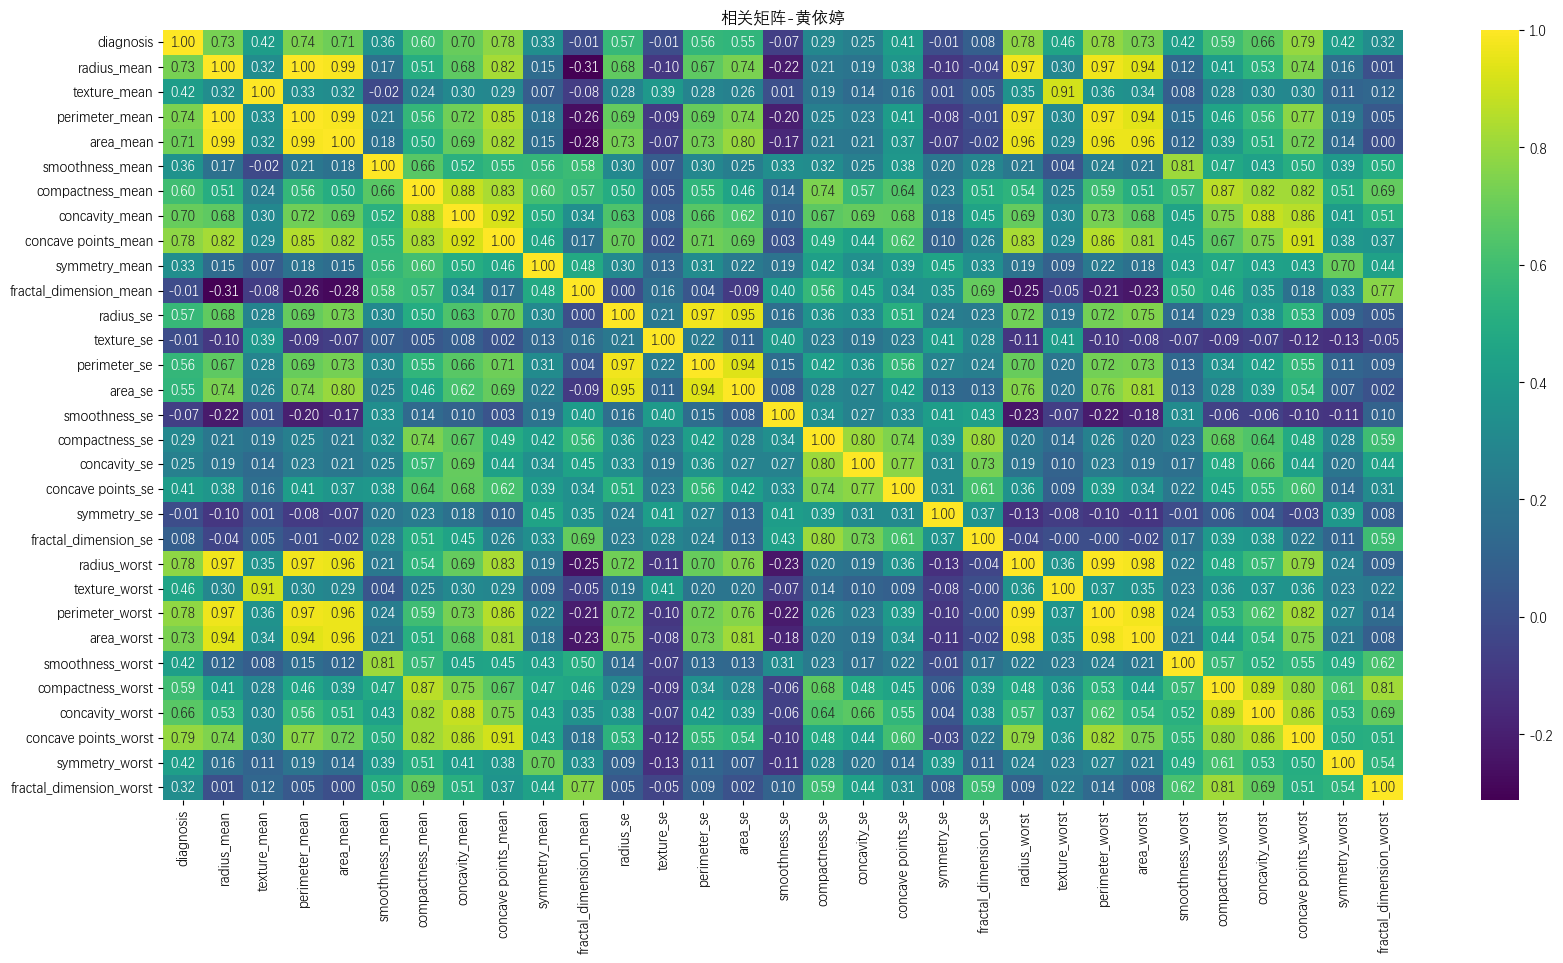

In [45]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('相关矩阵-黄依婷')
plt.show()

数据分割

In [46]:
X = data.drop(columns='diagnosis',axis=1)   # X去除诊断结果一列
y = data['diagnosis']   # y保存诊断结果，训练和测试
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)   # 随机分割训练集和测试值集

s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

print('训练集：', X_train.shape, y_train.shape)
print('测试集：', X_test.shape, y_test.shape)

训练集： (426, 30) (426,)
测试集： (143, 30) (143,)


标准化前后特征分布图

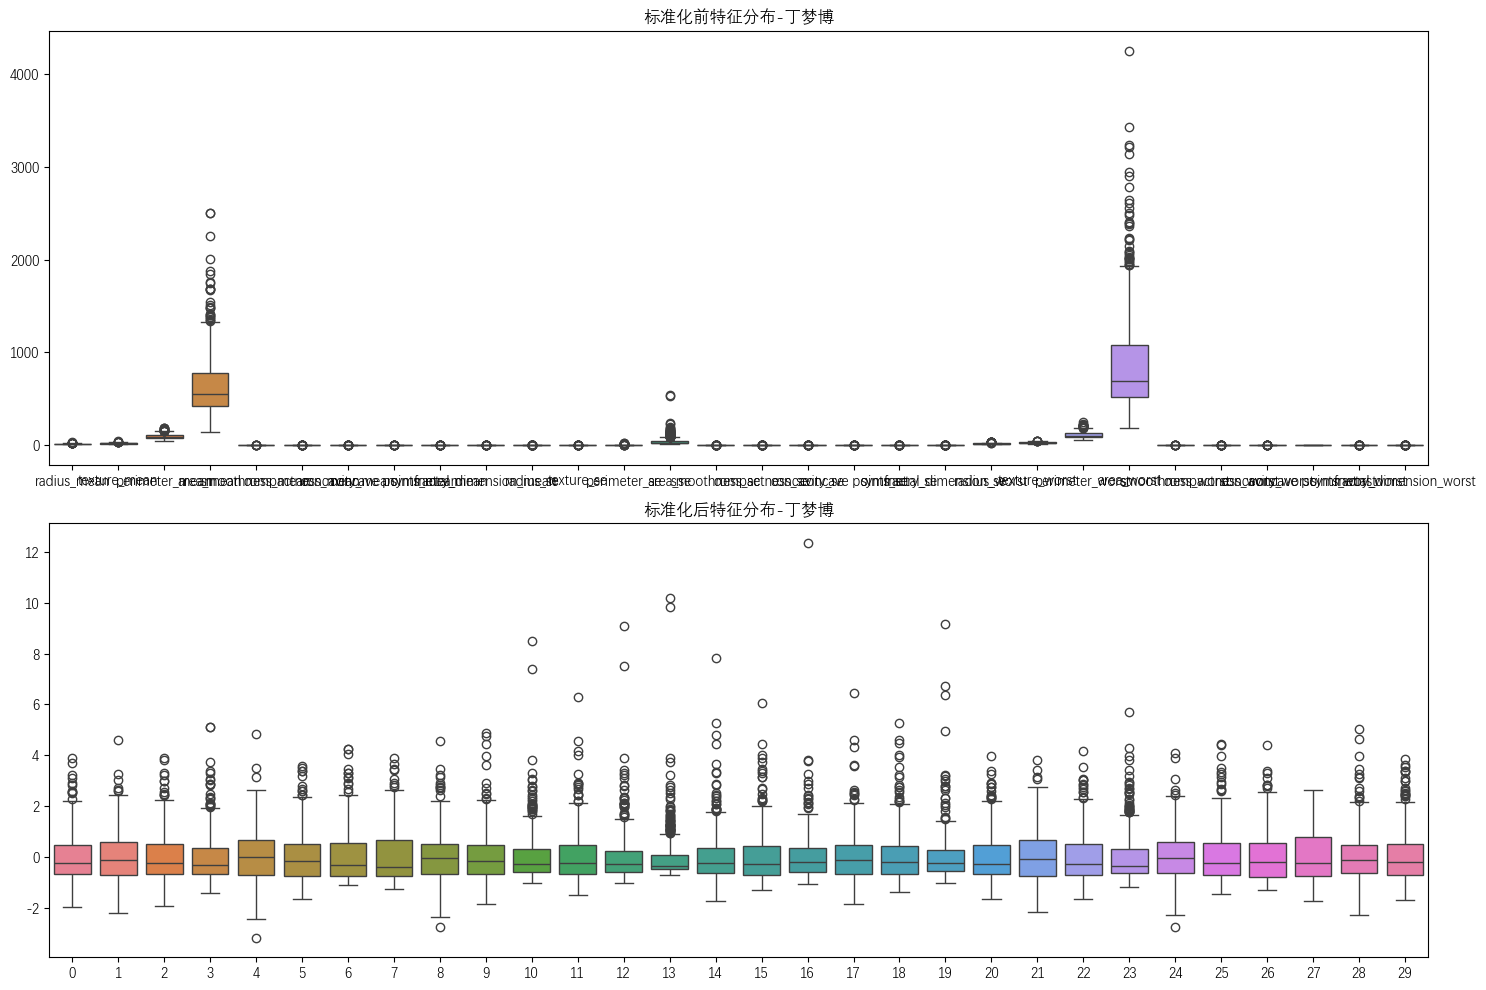

In [47]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.boxplot(data=X, ax=axes[0])
axes[0].set_title('标准化前特征分布-丁梦博')
sns.boxplot(data=X_train, ax=axes[1])
axes[1].set_title('标准化后特征分布-丁梦博')
plt.tight_layout()
plt.show()

# 数据集分类模型

建立不同的分类模型，计算得到不同模型的混肴矩阵confusion matrix、准确率accuracy、精确率precision、召回率recall、F1-值、ROC曲线，通过比较这些指标来判断那种模型效果最好。本工程采用的分类模型包括逻辑回归LogisticRegression、梯度提升树HistGradientBoostingClassifier、决策树DecisionTreeClassifier、随机森林RandomForestClassifier、支持向量机SVM。建立好相关模型后，使用以下方法（函数）得到需要的指标。
+ fit(X, y[, sample_weight, check_input, …])   根据训练集建立模型，可以理解为一个训练过程。

+ score(X, y[, sample_weight])	返回给定测试数据和标签上的平均准确率。

+ predict(X[, check_input])   预测X的类别或回归值。

+ metrics.classification_report(y_true，y_pred，*)   显示主要分类指标的文本报告,包括：
    + y_true 为样本真实标签；
    + y_pred 为样本预测标签；
    + accuracy   准确率，指分类正确的样本占总样本个数的比例，是针对所有样本的统计量，
        + accuracy = (TP+TN) / (TP + FP + TN + FN);
    + precision  精确率，也就是模型预测的结果中有多少是预测正确的，
        + precision = TP / (TP+FP)；
    + recall  召回率，也就是某个类别测试集中的总量，有多少样本预测正确了，
        + recall = TP / (TP+FN)；
    + f1-score  F1值，精确率和召回率的调和平均数，用于综合评估模型的性能，
        + F1 = 2 * precision * recall / (precision + recall)；
    + support 当前行class的类别在测试数据中的样本总量；
    + micro avg   微平均，计算所有数据下的指标值，假设全部数据 5 个样本中有 3 个预测正确，所以 micro avg 为 3/5=0.6
    + macro avg   宏平均，个类别评估指标未加权的平均值
    + weighted avg 加权平均。

TP表示真正率（True Positive），FP表示假正例（False Positive）,TP表示真正例（True Positive），FN表示假反例（False Negative）。

## LogisticRegression逻辑回归-何珮琳

+ LogisticRegression()   创建一个LogisticRegression分类模型

In [507]:
# 基于训练集X_train和y_train建立模型
lr = LogisticRegression()
lr.fit(X_train,y_train)

# 训练集平均准确率
score_train_lr = lr.score(X_train,y_train)

# 测试集的平均准确率
score_test_lr = lr.score(X_test,y_test)

# 预测测试集X_test的类别
y_pred_lr = lr.predict(X_test)

# 打印LogisticRegression分类指标
print('训练集平均准确率：', score_train_lr)
print('测试集平均准确率：', score_test_lr)
print(classification_report(y_test,y_pred_lr))

训练集平均准确率： 0.9906103286384976
测试集平均准确率： 0.965034965034965
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        88
           1       0.96      0.95      0.95        55

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



<Axes: >

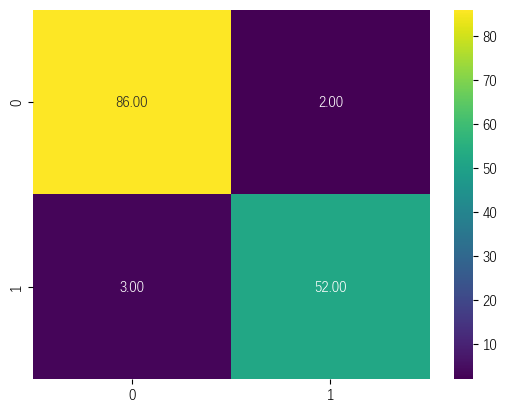

In [508]:
sns.heatmap(confusion_matrix(y_test,y_pred_lr), annot=True, cmap='viridis', fmt=".2f")

## HistGradientBoosting梯度提升-曹斌杰

+ HistGradientBoostingClassifier()   创建一个HistGradientBoosting分类模型。
  HistGradientBoostingClassifier原生支持缺失值和分类数据，可无需进行额外的预处理。

In [509]:
# 基于训练集X_train和y_train建立模型
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train, y_train)  

# 训练集平均准确率
score_train_hgb = hgb.score(X_train,y_train)

# 测试集的平均准确率
score_test_hgb = hgb.score(X_test,y_test)

# 预测测试集X_test的类别
y_pred_hgb = hgb.predict(X_test)

# 打印HistGradientBoostingClassifier分类指标
print('训练集平均准确率：', score_train_hgb)
print('测试集平均准确率：', score_test_hgb)
print(classification_report(y_test,y_pred_hgb))

训练集平均准确率： 1.0
测试集平均准确率： 0.951048951048951
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        88
           1       0.94      0.93      0.94        55

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



热图可视化HistGradientBoostingClassifier混肴矩阵

<Axes: >

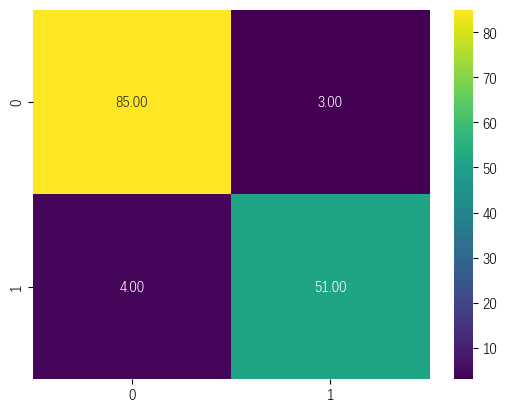

In [510]:
sns.heatmap(confusion_matrix(y_test,y_pred_hgb), annot=True, cmap='viridis', fmt=".2f")

## DecisionTree决策树-黄依婷

+ DecisionTreeClassifier()   创建一个DecisionTree分类模型。

In [511]:
# 基于训练集X_train和y_train建立模型
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# 训练集平均准确率   
score_train_dt = dt.score(X_train,y_train)

# 测试集的平均准确率
score_test_dt = dt.score(X_test,y_test)

# 预测测试集X_test的类别
y_pred_dt = dt.predict(X_test)

# 打印DecisionTreeClassifier分类指标
print('训练集平均准确率：', score_train_dt)
print('测试集平均准确率：', score_test_dt)
print(classification_report(y_test,y_pred_dt))

训练集平均准确率： 1.0
测试集平均准确率： 0.958041958041958
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        88
           1       0.95      0.95      0.95        55

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



热图可视化DecisionTreeClassifier混肴矩阵

<Axes: >

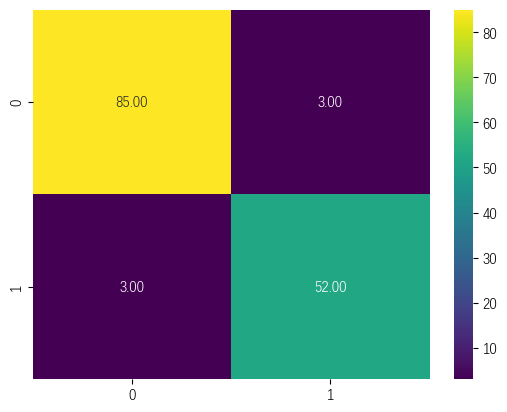

In [512]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt), annot=True, cmap='viridis', fmt=".2f")

## RandomForest随机森林-黄依婷

+ RandomForestClassifier() 创建一个Random Forest分类模型。

In [513]:
# 基于训练集X_train和y_train建立模型
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# 训练集平均准确率   1.0
score_train_rf = rf.score(X_train,y_train)

# 测试集的平均准确率   接近于1的小数
score_test_rf = rf.score(X_test,y_test)

# 预测测试集X_test的类别
y_pred_rf = rf.predict(X_test)

# 打印RandomForestClassifier分类指标
print('训练集平均准确率：', score_train_rf)
print('测试集平均准确率：', score_test_rf)
print(classification_report(y_test,y_pred_rf))

训练集平均准确率： 1.0
测试集平均准确率： 0.951048951048951
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        88
           1       0.94      0.93      0.94        55

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



热图可视化RandomForestClassifier混肴矩阵

<Axes: >

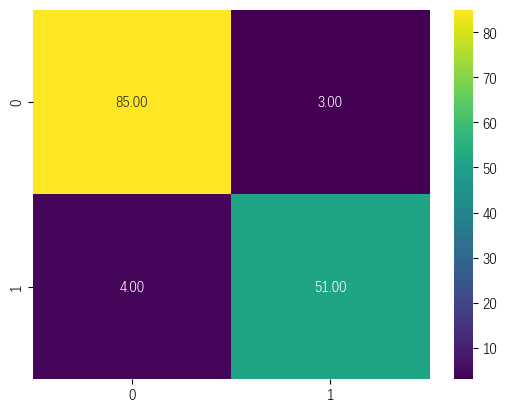

In [514]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True, cmap='viridis', fmt=".2f")

## SVM支持向量机-王由权

+ SVC() 创建一个SVM分类模型。

In [515]:
# 基于训练集X_train和y_train建立模型
clf = SVC()
clf.fit(X_train, y_train)

# 训练集平均准确率
score_train_clf = clf.score(X_train,y_train)

# 测试集的平均准确率
score_test_clf = clf.score(X_test,y_test)

# 预测测试集X_test的类别
y_pred_clf = clf.predict(X_test)

# 打印SVC分类指标
print('训练集平均准确率：', score_train_clf)
print('测试集平均准确率：', score_test_clf)
print(classification_report(y_test,y_pred_clf))

训练集平均准确率： 0.9882629107981221
测试集平均准确率： 0.951048951048951
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        88
           1       0.94      0.93      0.94        55

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



热图可视化SVC混肴矩阵

<Axes: >

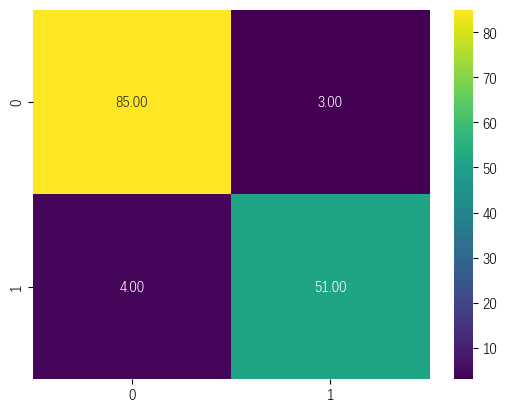

In [516]:
sns.heatmap(confusion_matrix(y_test,y_pred_clf), annot=True, cmap='viridis', fmt=".2f")

## KNN   K邻近算法-袁亮亮

+ KNeighborsClassifier() 创建一个KNN分类模型。

In [517]:
# 基于训练集X_train和y_train建立模型
knn = KNeighborsClassifier(algorithm='kd_tree')
knn.fit(X_train, y_train)

# 训练集平均准确率
score_train_knn = knn.score(X_train,y_train)

# 测试集的平均准确率
score_test_knn = knn.score(X_test,y_test)

# 预测测试集X_test的类别
y_pred_knn = knn.predict(X_test)

# 打印KNN分类指标
print('训练集平均准确率：', score_train_knn)
print('测试集平均准确率：', score_test_knn)
print(classification_report(y_test,y_pred_knn))

训练集平均准确率： 0.9812206572769953
测试集平均准确率： 0.951048951048951
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        88
           1       0.98      0.89      0.93        55

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



热图可视化KNN混肴矩阵

<Axes: >

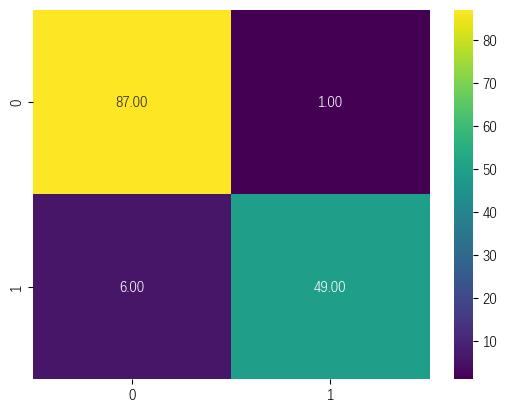

In [518]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot=True, cmap='viridis', fmt=".2f")

## ExtraTree极度随机树-袁亮亮

+ ExtraTreesClassifier() 创建一个ExtraTree分类模型。

In [519]:
# 基于训练集X_train和y_train建立模型
et = ExtraTreesClassifier(n_estimators=20, max_depth=None,min_samples_split=2, random_state=0)
et.fit(X_train, y_train)

# 训练集平均准确率
score_train_et = et.score(X_train,y_train)

# 测试集的平均准确率
score_test_et = et.score(X_test,y_test)

# 预测测试集X_test的类别
y_pred_et = et.predict(X_test)

# 打印ExtraTree分类指标
print('训练集平均准确率：', score_train_et)
print('测试集平均准确率：', score_test_et)
print(classification_report(y_test,y_pred_et))

训练集平均准确率： 1.0
测试集平均准确率： 0.972027972027972
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        88
           1       1.00      0.93      0.96        55

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



热图可视化ExtraTree混肴矩阵

<Axes: >

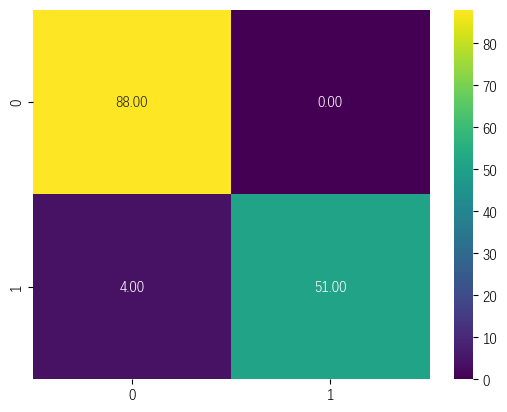

In [520]:
sns.heatmap(confusion_matrix(y_test,y_pred_et), annot=True, cmap='viridis', fmt=".2f")

## XGBoost极端梯度提升-袁亮亮

+ XGBClassifier() 创建一个XGBoost分类模型。

In [521]:
# 基于训练集X_train和y_train建立模型
xgb = XGBClassifier(n_estimators=100, max_depth=6, objective='binary:logistic',use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# 训练集平均准确率
score_train_xgb = xgb.score(X_train,y_train)

# 测试集的平均准确率
score_test_xgb = xgb.score(X_test,y_test)

# 预测测试集X_test的类别
y_pred_xgb = xgb.predict(X_test)

# 打印XGBoost分类指标
print('训练集平均准确率：', score_train_xgb)
print('测试集平均准确率：', score_test_xgb)
print(classification_report(y_test,y_pred_xgb))

训练集平均准确率： 1.0
测试集平均准确率： 0.9440559440559441
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        88
           1       0.96      0.89      0.92        55

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



热图可视化CGBoost混肴矩阵

<Axes: >

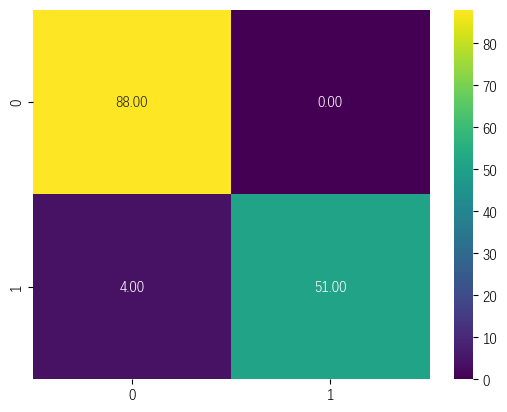

In [522]:
sns.heatmap(confusion_matrix(y_test,y_pred_et), annot=True, cmap='viridis', fmt=".2f")

# 模型效果比较

## 准确率比较-曹斌杰

统计各分类模型的准确率
+ accuracy_score() 计算各模型准确率。

表格可视化各分类模型准确率

In [523]:
model_names = ['LogisticRegression', 'HistGradientBoosting', 'DecisionTree', 'RandomForest', 'SVM', 'KNN', 'ExtraTrees', 'XGBoost']
models = [lr, hgb, dt, rf, clf, knn, et, xgb]
predictions = [model.predict(X_test) for model in models]
acc = [accuracy_score(y_test, pred) for pred in predictions]
results = pd.DataFrame([model_names,acc])
results.T

0         1
0    LogisticRegression  0.965035
1  HistGradientBoosting  0.951049
2          DecisionTree  0.958042
3          RandomForest  0.951049
4                   SVM  0.951049
5                   KNN  0.951049
6            ExtraTrees  0.972028
7               XGBoost  0.944056

折线图可视化各分类模型准确率

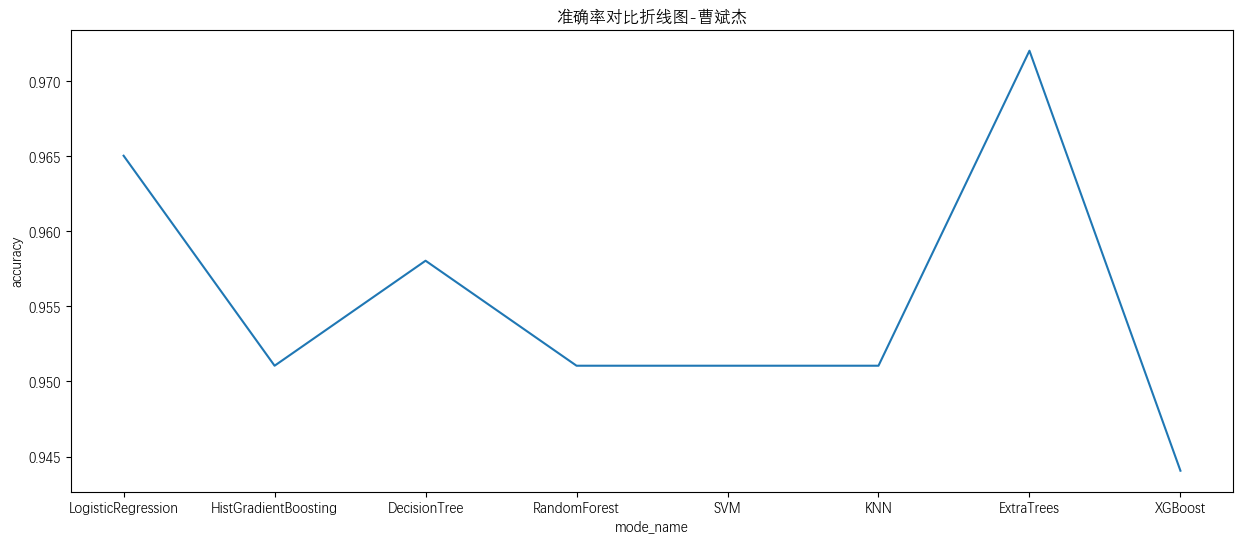

In [524]:
plt.figure(figsize=(15, 6))
plt.plot(model_names, acc)
plt.xlabel('mode_name')
plt.ylabel('accuracy')
plt.title("准确率对比折线图-曹斌杰")
plt.show()

## 特征贡献度分析-曹斌杰、袁亮亮

+ HistGradientBoosting梯度提升

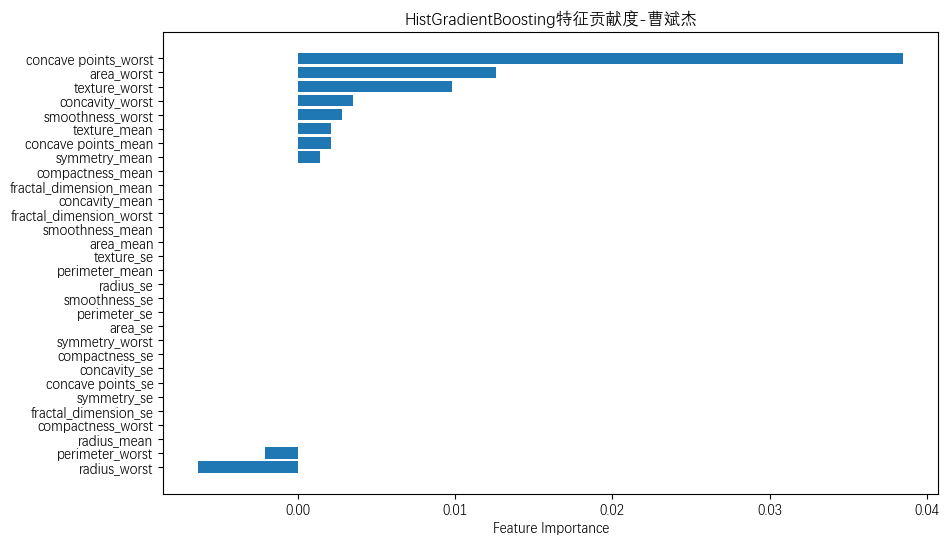

In [525]:
feature_names = X.columns

# 获取特征贡献度
r_hgb = permutation_importance(hgb, X_test, y_test, n_repeats=10, random_state=42)
feature_importances_hgb = r_hgb.importances_mean
sorted_idx_hgb = feature_importances_hgb.argsort()

# 绘制图表可视化
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_hgb)), feature_importances[sorted_idx_hgb])
plt.yticks(range(len(sorted_idx_hgb)), [feature_names[i] for i in sorted_idx_hgb])
plt.xlabel("Feature Importance")
plt.title("HistGradientBoosting特征贡献度-曹斌杰")
plt.show()

+ ExtraTree极端随机树

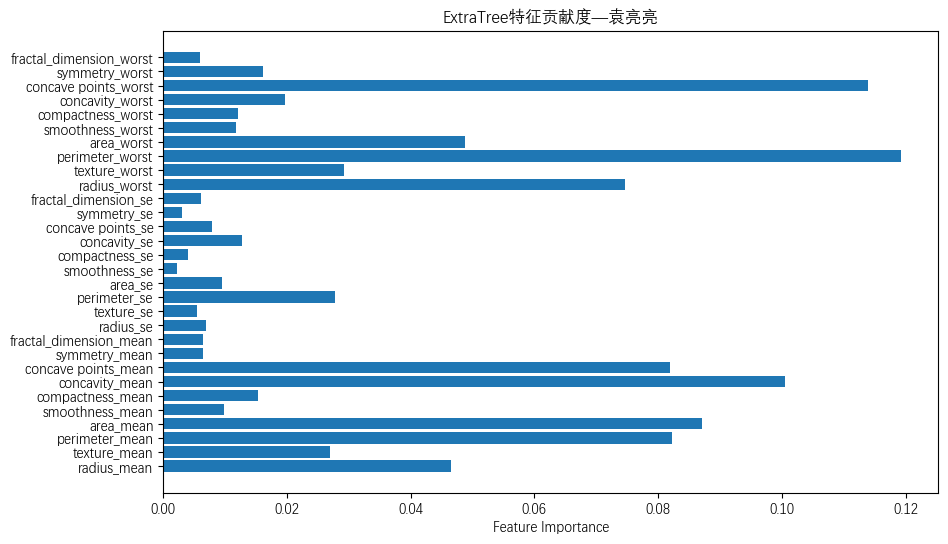

In [526]:
# 获取各特征贡献度
et_feature_importance = et.feature_importances_

# 绘制图表可视化
plt.figure(figsize=(10, 6))
plt.barh(feature_names, et_feature_importance)
plt.xlabel("Feature Importance")
plt.title('ExtraTree特征贡献度—袁亮亮')
plt.show()

+ XGBoost极端梯度提升

In [ ]:
# 获取各特征贡献度
xgb_feature_importance = xgb.feature_importances_

# 绘制图表可视化
plt.figure(figsize=(10, 6))
plt.barh(feature_names, xgb_feature_importance)
plt.xlabel("Feature Importance")
plt.title('XGBoost特征贡献度—袁亮亮')
plt.show()

比较中可以发现，ExtraTree分类模型较为贴合乳腺癌数据集的数据，准确率较高，且各特征贡献率都比其他的分类模型相对优秀。